# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
raw_cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in raw_cities:
        raw_cities.append(city)

# Print the city count to confirm sufficient count
len(raw_cities)

594

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Initialize the List attributes.
cities = []
lats = []
lngs = []
max_temps = []
humidities = []
cloudinesses = []
wind_speeds = []
countries = []
dates = []

# Initialize counters for print log
set_counter = 0;
record_counter = 0;

# Set the units to "imperial" to retrieve temperature in "Fahrenheit" and speed in Mph; units = "metric" would retrieve temperature in "Celsius" meter/sec
units = "imperial"

# Loggers followed by successive API calls for all the cities in the list.
print('Beginning Data Retrieval')
print('-----------------------------')

# raw_cities = ['houston', 'Los Angeles', 'Sushma', 'New York']
for i, city in enumerate(raw_cities):
    
    # set/reset the logger counters 
    if(i % 50 == 0):
        set_counter += 1
        record_counter = 1
        
    print(f"processing Record {record_counter} of Set {set_counter} | {city}")
    
    # API calls 
    try:
        query_url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q={city}"
        response = requests.get(query_url)

#       append the list elements only for valid cities
        if response.status_code == 200:
            weatherData = response.json()

            cities.append(weatherData['name'])
            lats.append(weatherData['coord']['lat'])
            lngs.append(weatherData['coord']['lon'])
            max_temps.append(weatherData['main']['temp_max'])
            humidities.append(weatherData['main']['humidity'])
            cloudinesses.append(weatherData['clouds']['all'])
            wind_speeds.append(weatherData['wind']['speed'])
            countries.append(weatherData['sys']['country'])
            dates.append(weatherData['dt'])
        else:
            print(f"City {city} not found. Skipping...")

    except e:
        print(f"City {city} not found. Skipping... {e}")
    
    record_counter += 1

#  API Call end logger    
print('-----------------------------')
print('Data Retrieval Complete')
print('-----------------------------')

Beginning Data Retrieval
-----------------------------
processing Record 1 of Set 1 | pisco
processing Record 2 of Set 1 | rikitea
processing Record 3 of Set 1 | opuwo
processing Record 4 of Set 1 | mataura
processing Record 5 of Set 1 | roma
processing Record 6 of Set 1 | iqaluit
processing Record 7 of Set 1 | klaksvik
processing Record 8 of Set 1 | mabai
processing Record 9 of Set 1 | chifeng
processing Record 10 of Set 1 | ronne
processing Record 11 of Set 1 | ushuaia
processing Record 12 of Set 1 | lasa
processing Record 13 of Set 1 | hermanus
processing Record 14 of Set 1 | yellowknife
processing Record 15 of Set 1 | correntina
processing Record 16 of Set 1 | grand gaube
processing Record 17 of Set 1 | busselton
processing Record 18 of Set 1 | bama
processing Record 19 of Set 1 | cockburn harbour
City cockburn harbour not found. Skipping...
processing Record 20 of Set 1 | hobart
processing Record 21 of Set 1 | faanui
processing Record 22 of Set 1 | saint-philippe
processing Record

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Convert Raw Data into DataFrame

cityWeatherDF = pd.DataFrame({
    "City": cities,
    "Lat": lats,
    "Lng": lngs,
    "Max Temp": max_temps,
    "Humidity": humidities,
    "Cloudiness": cloudinesses,
    "Wind Speed": wind_speeds,
    "Country": countries,
    "Date": dates
})

In [5]:
#  Display the DataFrame

cityWeatherDF.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pisco,-13.7000,-76.2167,68.05,83,100,8.05,PE,1640938693
1,Rikitea,-23.1203,-134.9692,77.14,77,98,13.11,PF,1640938693
2,Opuwo,-18.0607,13.8400,81.16,32,32,10.78,NA,1640938694
3,Mataura,-46.1927,168.8643,66.47,59,82,8.70,NZ,1640938695
4,Rome,43.2128,-75.4557,41.72,96,90,0.00,US,1640938695


In [6]:
# Validate the record counts and all the columns have the same number of records.

cityWeatherDF.count()

City          542
Lat           542
Lng           542
Max Temp      542
Humidity      542
Cloudiness    542
Wind Speed    542
Country       542
Date          542
dtype: int64

In [7]:
# There are more than 500 Unique Cities taken for the analysis

cityWeatherDF.nunique()

City          542
Lat           542
Lng           542
Max Temp      503
Humidity       84
Cloudiness     77
Wind Speed    319
Country       108
Date          336
dtype: int64

In [8]:
# Export Data into .csv file
cityWeatherDF.to_csv("../../output_data/city_weather.csv", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
# Inspect the data to identify the cities with humidity > 100%

cityWeatherDF.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,5.420000e+02
mean,20.939071,17.555990,50.019373,73.306273,64.291513,7.872657,1.640939e+09
std,33.808978,91.620764,33.189767,22.340135,38.403682,5.760179,1.084391e+02
min,-54.800000,-179.166700,-44.010000,11.000000,0.000000,0.000000,1.640938e+09
25%,-7.195575,-64.947550,28.952500,61.000000,26.000000,3.395000,1.640939e+09
50%,26.931550,21.360050,61.455000,78.000000,82.000000,6.910000,1.640939e+09
75%,50.120900,100.349575,75.417500,93.000000,100.000000,10.742500,1.640939e+09
max,78.218600,179.316700,103.320000,100.000000,100.000000,32.060000,1.640939e+09


#### By looking at the minimum and maximum value of Humidity, we can see the no cities have humidity greater than 100%. So no rows displayed after below filter selection too.

In [10]:
#  Get the indices of cities that have humidity over 100%.
cityWeatherDF.loc[cityWeatherDF['Humidity'] > 100]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

cleanCityWeatherDF = cityWeatherDF.loc[cityWeatherDF['Humidity'] <= 100]
cleanCityWeatherDF.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pisco,-13.7000,-76.2167,68.05,83,100,8.05,PE,1640938693
1,Rikitea,-23.1203,-134.9692,77.14,77,98,13.11,PF,1640938693
2,Opuwo,-18.0607,13.8400,81.16,32,32,10.78,NA,1640938694
3,Mataura,-46.1927,168.8643,66.47,59,82,8.70,NZ,1640938695
4,Rome,43.2128,-75.4557,41.72,96,90,0.00,US,1640938695


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

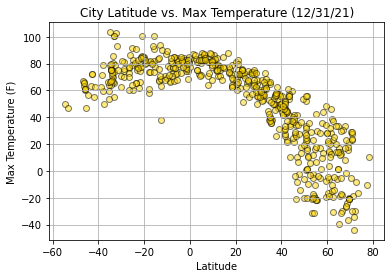

In [12]:
x = cleanCityWeatherDF['Lat']
y = cleanCityWeatherDF['Max Temp']

plt.title(f'City Latitude vs. Max Temperature ({time.strftime("%x")})')
plt.xlabel("Latitude")
plt.ylabel('Max Temperature (F)')
plt.scatter(x, y, color="gold", alpha=0.5, edgecolors="black")
plt.grid()
plt.savefig("../../Images/WeatherPy_CityLat_vs_MaxTemp.png")
plt.show()

## Latitude vs. Humidity Plot

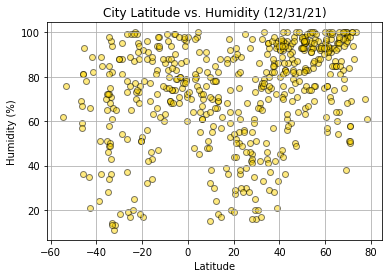

In [13]:
x = cleanCityWeatherDF['Lat']
y = cleanCityWeatherDF['Humidity']

plt.title(f'City Latitude vs. Humidity ({time.strftime("%x")})')
plt.xlabel("Latitude")
plt.ylabel('Humidity (%)')
plt.scatter(x, y, color="gold", alpha=0.5, edgecolors="black")
plt.grid()
plt.savefig("../../Images/WeatherPy_CityLat_vs_Humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

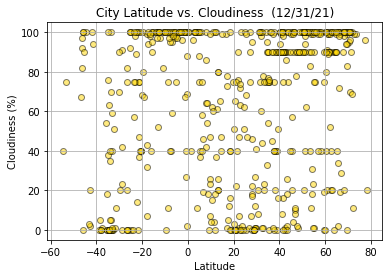

In [14]:
x = cleanCityWeatherDF['Lat']
y = cleanCityWeatherDF['Cloudiness']

plt.title(f'City Latitude vs. Cloudiness  ({time.strftime("%x")})')
plt.xlabel("Latitude")
plt.ylabel('Cloudiness (%)')
plt.scatter(x, y, color="gold", alpha=0.5, edgecolors="black")
plt.grid()
plt.savefig("../../Images/WeatherPy_CityLat_vs_Cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

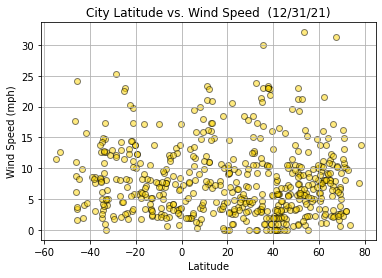

In [15]:
x = cleanCityWeatherDF['Lat']
y = cleanCityWeatherDF['Wind Speed']

plt.title(f'City Latitude vs. Wind Speed  ({time.strftime("%x")})')
plt.xlabel("Latitude")
plt.ylabel('Wind Speed (mph)')
plt.scatter(x, y, color="gold", alpha=0.5, edgecolors="black")
plt.grid()
plt.savefig("../../Images/WeatherPy_CityLat_vs_WindSpeed.png")
plt.show()

## Linear Regression

In [16]:
# OPTIONAL: Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, plot_title, annotate_coords, x_label, y_label, plot_location):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values) # linregress - helps find the best line equation for the data in the scatter plot

    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    print(f"The r-squared is: {rvalue**2}")

    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,annotate_coords,fontsize=15,color="red")
    plt.title(plot_title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.savefig(plot_location)
    plt.show()

In [17]:
# Create Northern and Southern Hemisphere DataFrames
# Since Equator represents 0 degree Latitude; 
#     all cities with Latitude greater than 0 are considered to be part of Northern Hemisphere,
#     all cities with Latitude less than 0 are considered to be in Southern Hemisphere

northernHemisphereDF = cleanCityWeatherDF.loc[(cleanCityWeatherDF['Lat'] >= 0)]
northernHemisphereDF.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
4,Rome,43.2128,-75.4557,41.72,96,90,0.00,US,1640938695
5,Iqaluit,63.7506,-68.5145,13.73,85,90,9.22,CA,1640938576
6,Klaksvík,62.2266,-6.5890,38.32,71,100,21.59,FO,1640938696
7,Mabai,23.0128,104.4508,51.37,89,100,4.92,CN,1640938697
8,Chifeng,42.2683,118.9636,22.89,36,0,4.05,CN,1640938697


In [18]:
# Since Equator represents 0 degree Latitude; 
#     all cities with Latitude less than 0 are considered to be in Southern Hemisphere

southernHemisphereDF = cleanCityWeatherDF.loc[(cleanCityWeatherDF['Lat'] < 0)]
southernHemisphereDF.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pisco,-13.7000,-76.2167,68.05,83,100,8.05,PE,1640938693
1,Rikitea,-23.1203,-134.9692,77.14,77,98,13.11,PF,1640938693
2,Opuwo,-18.0607,13.8400,81.16,32,32,10.78,NA,1640938694
3,Mataura,-46.1927,168.8643,66.47,59,82,8.70,NZ,1640938695
10,Ushuaia,-54.8000,-68.3000,49.66,62,40,11.50,AR,1640938698


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7405363630411732


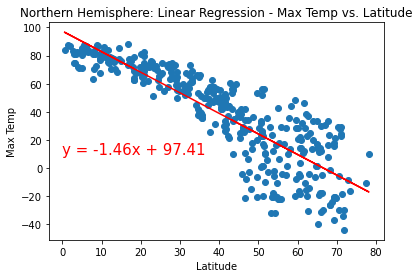

In [19]:
# Add the linear regression equation and line to plot
x_values = northernHemisphereDF['Lat']
y_values = northernHemisphereDF['Max Temp']

plot_title = "Northern Hemisphere: Linear Regression - Max Temp vs. Latitude"
annotate_coords = (0,10)
x_label = 'Latitude'
y_label = 'Max Temp'
plot_location = "../../Images/WeatherPy_NorthernHemisphere_Latitude_vs_MaxTemp.png"

plot_linear_regression(x_values, y_values, plot_title, annotate_coords, x_label, y_label, plot_location)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.14105740779273013


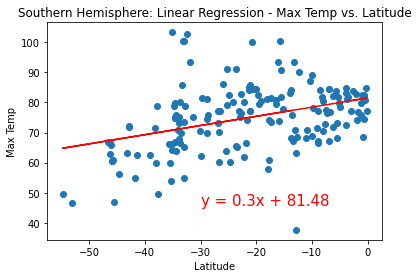

In [20]:
# Add the linear regression equation and line to plot
x_values = southernHemisphereDF['Lat']
y_values = southernHemisphereDF['Max Temp']

plot_title = "Southern Hemisphere: Linear Regression - Max Temp vs. Latitude"
annotate_coords = (-30,46)
x_label = 'Latitude'
y_label = 'Max Temp'
plot_location = "../../Images/WeatherPy_SouthernHemisphere_Latitude_vs_MaxTemp.png"

plot_linear_regression(x_values, y_values, plot_title, annotate_coords, x_label, y_label, plot_location)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.173955679358553


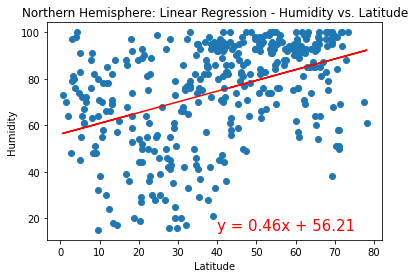

In [21]:
# Add the linear regression equation and line to plot
x_values = northernHemisphereDF['Lat']
y_values = northernHemisphereDF['Humidity']

plot_title = "Northern Hemisphere: Linear Regression - Humidity vs. Latitude"
annotate_coords = (40,15)
x_label = 'Latitude'
y_label = 'Humidity'
plot_location = "../../Images/WeatherPy_NorthernHemisphere_Latitude_vs_Humidity.png"

plot_linear_regression(x_values, y_values, plot_title, annotate_coords, x_label, y_label, plot_location)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10881017698385287


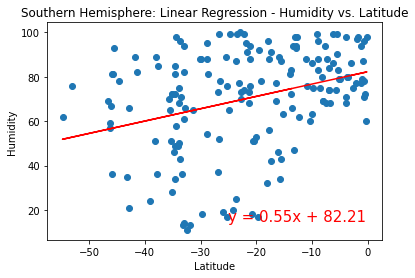

In [24]:
# Add the linear regression equation and line to plot
x_values = southernHemisphereDF['Lat']
y_values = southernHemisphereDF['Humidity']

plot_title = "Southern Hemisphere: Linear Regression - Humidity vs. Latitude"
annotate_coords = (-25,15)
x_label = 'Latitude'
y_label = 'Humidity'
plot_location = "../../Images/WeatherPy_SouthernHemisphere_Latitude_vs_Humidity.png"

plot_linear_regression(x_values, y_values, plot_title, annotate_coords, x_label, y_label, plot_location)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.07764101701628666


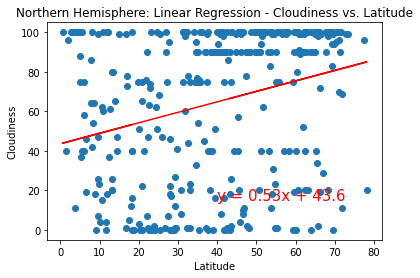

In [25]:
# Add the linear regression equation and line to plot
x_values = northernHemisphereDF['Lat']
y_values = northernHemisphereDF['Cloudiness']

plot_title = "Northern Hemisphere: Linear Regression - Cloudiness vs. Latitude"
annotate_coords = (40,15)
x_label = 'Latitude'
y_label = 'Cloudiness'
plot_location = "../../Images/WeatherPy_NorthernHemisphere_Latitude_vs_Cloudiness.png"

plot_linear_regression(x_values, y_values, plot_title, annotate_coords, x_label, y_label, plot_location)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.20442842766425473


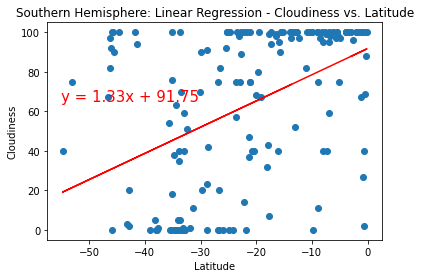

In [26]:
# Add the linear regression equation and line to plot
x_values = southernHemisphereDF['Lat']
y_values = southernHemisphereDF['Cloudiness']

plot_title = "Southern Hemisphere: Linear Regression - Cloudiness vs. Latitude"
annotate_coords = (-55,65)
x_label = 'Latitude'
y_label = 'Cloudiness'
plot_location = "../../Images/WeatherPy_SouthernHemisphere_Latitude_vs_Cloudiness.png"

plot_linear_regression(x_values, y_values, plot_title, annotate_coords, x_label, y_label, plot_location)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0015671708517801934


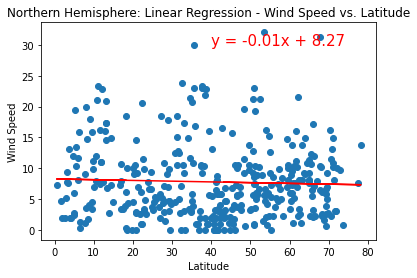

In [27]:
# Add the linear regression equation and line to plot
x_values = northernHemisphereDF['Lat']
y_values = northernHemisphereDF['Wind Speed']

plot_title = "Northern Hemisphere: Linear Regression - Wind Speed vs. Latitude"
annotate_coords = (40,30)
x_label = 'Latitude'
y_label = 'Wind Speed'
plot_location = "../../Images/WeatherPy_NorthernHemisphere_Latitude_vs_Wind Speed.png"

plot_linear_regression(x_values, y_values, plot_title, annotate_coords, x_label, y_label, plot_location)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.028820399044805694


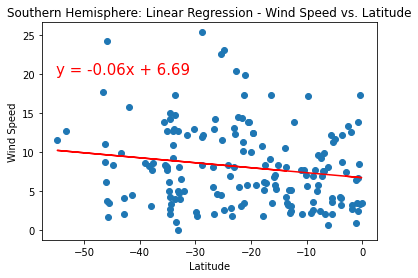

In [28]:
# Add the linear regression equation and line to plot
x_values = southernHemisphereDF['Lat']
y_values = southernHemisphereDF['Wind Speed']

plot_title = "Southern Hemisphere: Linear Regression - Wind Speed vs. Latitude"
annotate_coords = (-55,20)
x_label = 'Latitude'
y_label = 'Wind Speed'
plot_location = "../../Images/WeatherPy_SouthernHemisphere_Latitude_vs_Wind Speed.png"

plot_linear_regression(x_values, y_values, plot_title, annotate_coords, x_label, y_label, plot_location)